<a href="https://colab.research.google.com/github/vsharma1205/AirlinesHub-Prediction/blob/main/Airlines_Hub_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Import pandas, numpy and regular expression libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

#To get the data and assign column Names
data = pd.read_csv('routes_v3.txt', names=["AirlineCode", "AirlineID", "SourceAirportCode", "SourceAirportID", "DestinationAirportCode", "DestinationAirportID", "CodeShare", "Stops", "Equipments"])

#Print the data
data

,AirlineCode,AirlineID,SourceAirportCode,SourceAirportID,DestinationAirportCode,DestinationAirportID,CodeShare,Stops,Equipments
0,AL242,AL242,AER,2965,KZN,2990,NaN,0,CR2
1,AL242,AL242,ASF,2966,KZN,2990,NaN,0,CR2
2,AL242,AL242,ASF,2966,MRV,2962,NaN,0,CR2
3,AL242,AL242,CEK,2968,KZN,2990,NaN,0,CR2
4,AL242,AL242,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,AL156,AL156,WYA,6334,ADL,3341,NaN,0,SF3
67659,AL530,AL530,DME,4029,FRU,2912,NaN,0,734
67660,AL530,AL530,FRU,2912,DME,4029,NaN,0,734
67661,AL530,AL530,FRU,2912,OSS,2913,NaN,0,734


In [21]:
# Filtering our Team Data
filterdata = data[data['AirlineCode']=='AL6']
filterdata.to_csv('AL6Airlines.csv', index=False)
teamdata = pd.read_csv('AL6Airlines.csv')
teamdata

,AirlineCode,AirlineID,SourceAirportCode,SourceAirportID,DestinationAirportCode,DestinationAirportID,CodeShare,Stops,Equipments
0,AL6,AL6,ACX,7506,NAY,6341,Y,0,737
1,AL6,AL6,ACX,7506,PVG,3406,NaN,0,319
2,AL6,AL6,AKL,2006,MEL,3339,Y,0,73H
3,AL6,AL6,AKL,2006,SYD,3361,Y,0,73H
4,AL6,AL6,AMS,580,BCN,1218,NaN,0,737
...,...,...,...,...,...,...,...,...,...
1258,AL6,AL6,ZQZ,10940,SJW,6347,NaN,0,320
1259,AL6,AL6,ZUH,6355,PVG,3406,NaN,0,738
1260,AL6,AL6,ZUH,6355,SHA,3391,NaN,0,320 321
1261,AL6,AL6,ZYI,9846,NKG,3388,NaN,0,320


In [22]:
# To have only Source Airport Code and Destination Airport Code columns which helps in plotting Graph
route_graph = nx.from_pandas_edgelist(teamdata,source='SourceAirportCode',target='DestinationAirportCode')

In [23]:
# To get Information about Graph
nx.info(route_graph)

'Graph with 222 nodes and 632 edges'

In [24]:
# This snippet is to confirm the number of nodes
uniqueValues = (teamdata['SourceAirportCode'].append(teamdata['DestinationAirportCode'])).unique()
uniqueValues
len(uniqueValues)

222

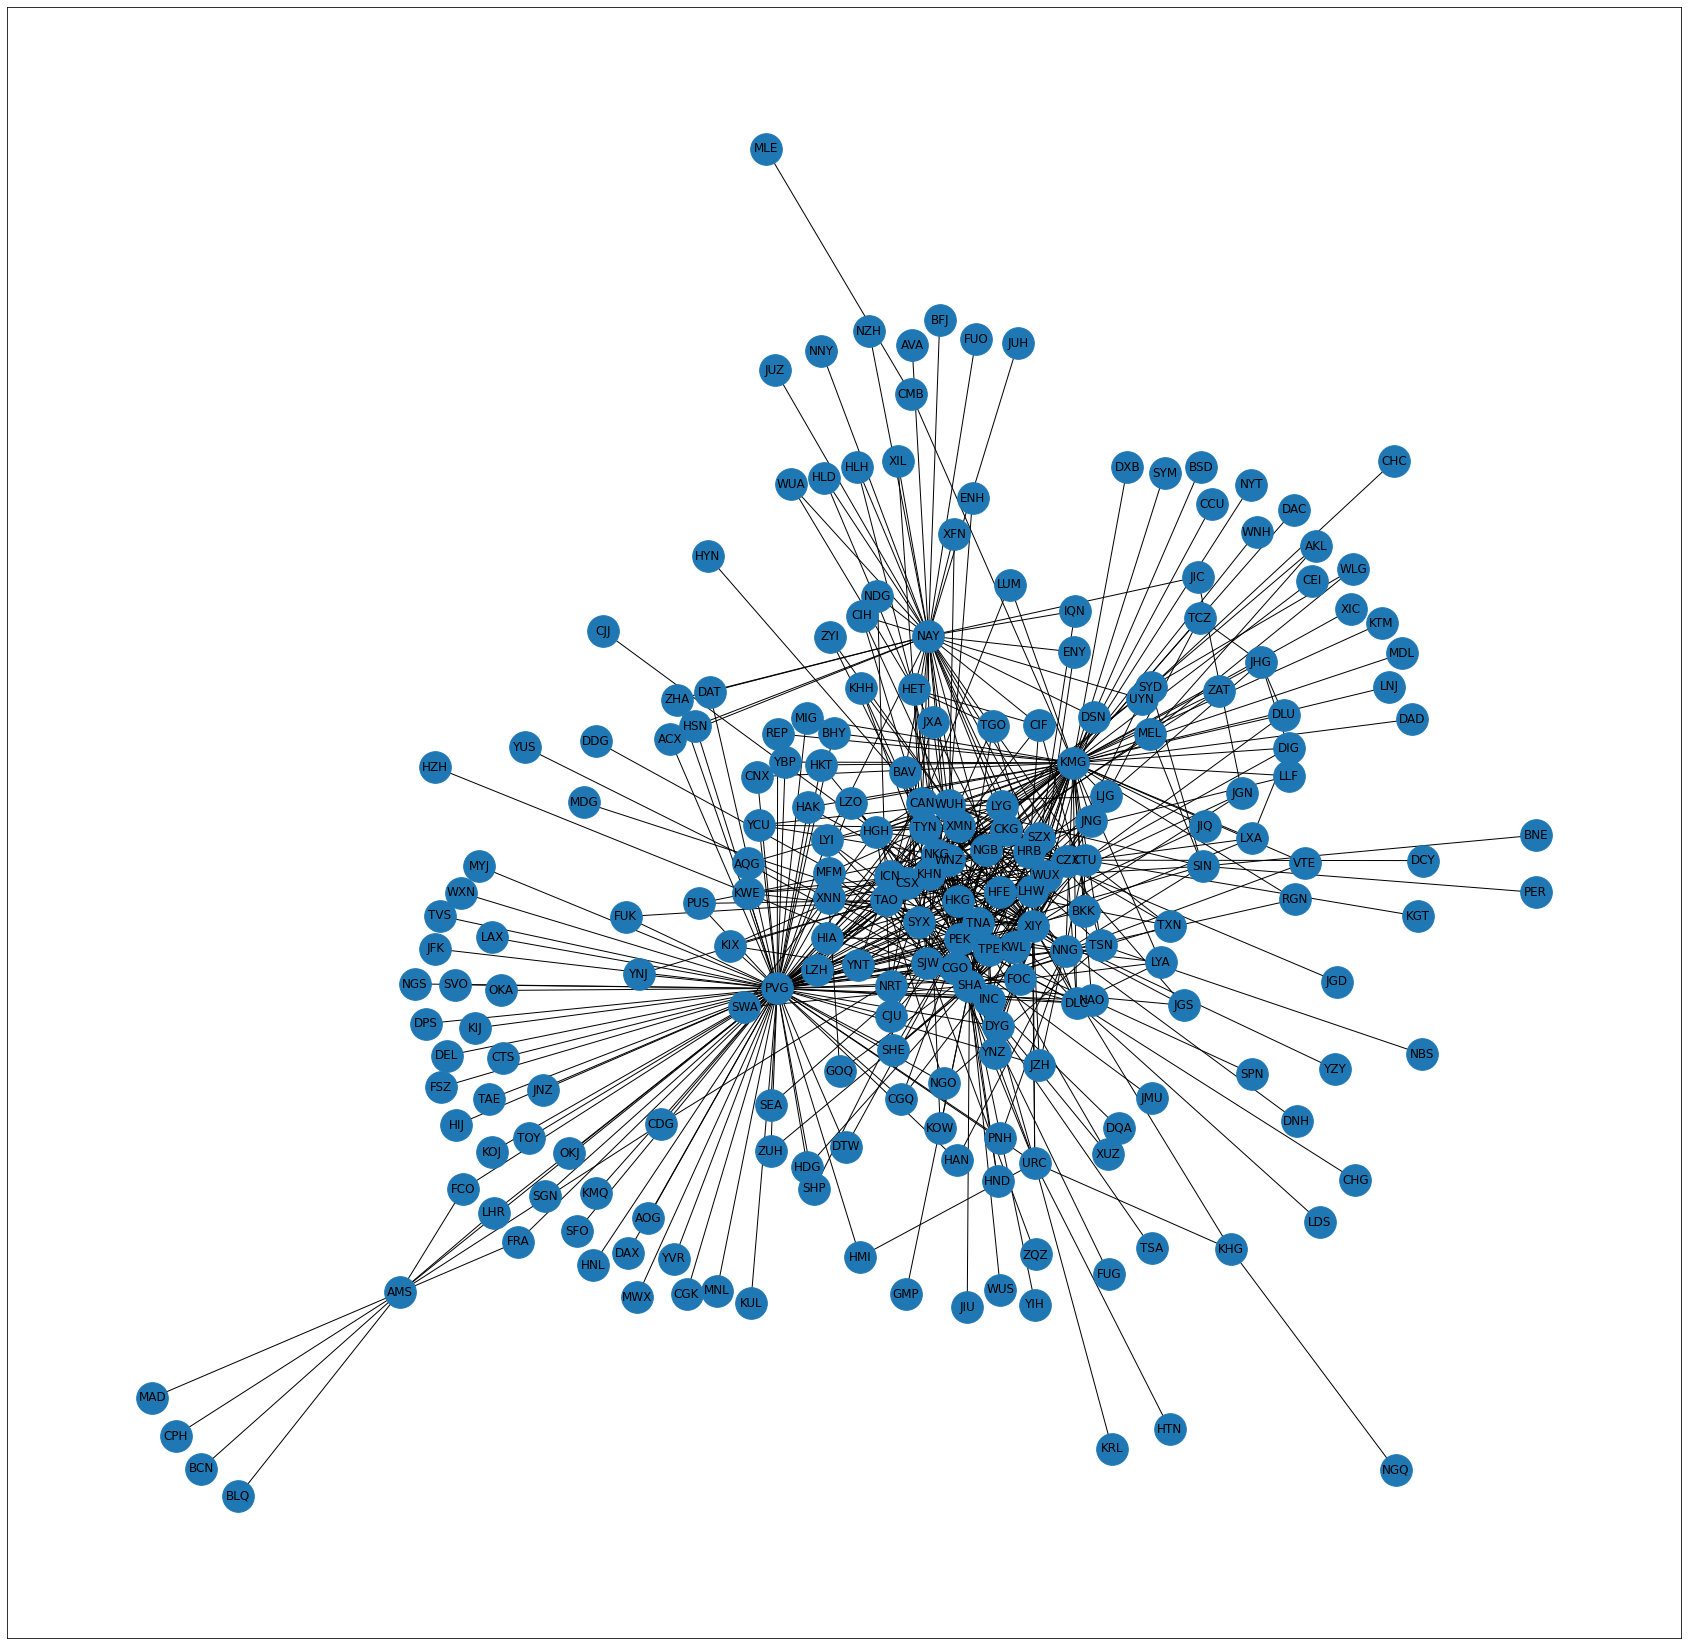

In [25]:
# Constructing Graph Data Structure
plt.figure(figsize=(30,30))
nx.draw_networkx(route_graph,with_labels=True,node_size=1000)
plt.savefig("RouteGraph.png", dpi=200)
plt.show()

In [26]:
# To print the degree of each Node
d=nx.degree(route_graph)
print(d)

[('ACX', 2), ('NAY', 40), ('PVG', 110), ('AKL', 2), ('MEL', 4), ('SYD', 6), ('AMS', 9), ('BCN', 1), ('BLQ', 1), ('CDG', 3), ('CPH', 1), ('FCO', 2), ('FRA', 2), ('LHR', 2), ('MAD', 1), ('AOG', 1), ('AQG', 2), ('SHA', 55), ('WUH', 31), ('AVA', 1), ('BAV', 4), ('NKG', 36), ('SJW', 13), ('BFJ', 1), ('BHY', 2), ('KMG', 72), ('BKK', 4), ('CTU', 26), ('NGB', 18), ('BNE', 1), ('SIN', 8), ('BSD', 1), ('CAN', 23), ('HFE', 13), ('HGH', 18), ('HIA', 4), ('HYN', 1), ('KHN', 19), ('LHW', 14), ('LJG', 8), ('LUM', 2), ('NRT', 5), ('TAO', 32), ('TNA', 8), ('TYN', 18), ('WNZ', 12), ('WUX', 12), ('XIY', 53), ('XMN', 13), ('CCU', 1), ('PEK', 40), ('CEI', 1), ('CGK', 1), ('CGO', 10), ('DLC', 13), ('INC', 9), ('URC', 10), ('XNN', 8), ('CGQ', 3), ('CHC', 1), ('CHG', 1), ('CIF', 5), ('HET', 12), ('HRB', 11), ('TSN', 7), ('CIH', 3), ('CJJ', 1), ('CJU', 4), ('CKG', 16), ('CZX', 10), ('TXN', 4), ('ZAT', 2), ('CMB', 2), ('MLE', 1), ('CNX', 2), ('CSX', 12), ('ICN', 9), ('KWE', 6), ('LZH', 5), ('YNZ', 5), ('CTS', 1

In [27]:
# To convert the degree output to Data Frame inorder to make operations easier
dlist = pd.DataFrame(d, columns=['AirportCode', 'Degree'])
print(dlist)

    AirportCode  Degree
0           ACX       2
1           NAY      40
2           PVG     110
3           AKL       2
4           MEL       4
..          ...     ...
217         XUZ       2
218         YIH       1
219         ZQZ       1
220         YZY       1
221         YUS       1

[222 rows x 2 columns]


In [28]:
# Finding all the Graph Characterstics
avgDegree = dlist['Degree'].mean()
minDegree = min(dlist['Degree'])
maxDegree = max(dlist['Degree'])
stdDevDegree = dlist['Degree'].std()
numNodes = route_graph.number_of_nodes()
numEdges = route_graph.number_of_edges()
numConnComp = nx.number_connected_components(route_graph)
ConnComp = nx.connected_components(route_graph)
grpDensity = nx.density(route_graph)
grpDiam = nx.diameter(route_graph)

print("Number of Nodes = ", numNodes)
print("Number of Edges = ", numEdges)
print("Density = ", grpDensity)
print("Number of Connected Components = ", numConnComp)
print("Connected Components = ", ConnComp)
print("Diameter = ", grpDiam)
print("Minimum Degree = ",minDegree)
print("Maximum Degree = ",maxDegree)
print("Average Degree = ", avgDegree)
print("Standard Deviation Degree = ",stdDevDegree)

Number of Nodes =  222
Number of Edges =  632
Density =  0.025763319880966938
Number of Connected Components =  1
Connected Components =  <generator object connected_components at 0x7f9884205ed0>
Diameter =  5
Minimum Degree =  1
Maximum Degree =  110
Average Degree =  5.693693693693693
Standard Deviation Degree =  11.594422744732913


In [29]:
# Finding Top-5 Hubs 
top5 = pd.DataFrame(dlist.sort_values(by=['Degree'], ascending=False)[:5], index=None)
top5

,AirportCode,Degree
2,PVG,110
25,KMG,72
17,SHA,55
47,XIY,53
50,PEK,40


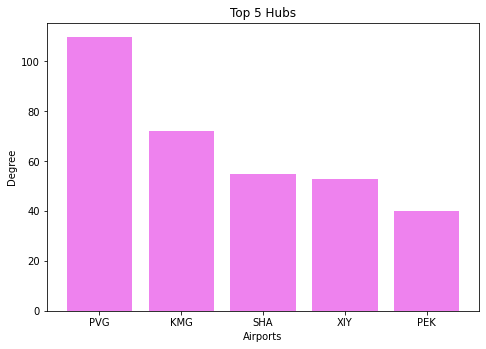

In [30]:
# PLotting Histogram for Top-5 Hubs
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(top5['AirportCode'],top5['Degree'],color='violet')
ax.set_xlabel('Airports')
ax.set_ylabel('Degree')
ax.set_title('Top 5 Hubs')
plt.savefig("Top5-Hubs.png", dpi=200)
plt.show()

In [31]:
# To find the degree distribution table to plot Degree Distribution Graph
degdist = pd.DataFrame(columns=["freq", "labels"])
degdist['freq'] = dlist['Degree'].value_counts()
degdist['labels'] = dlist['Degree'].value_counts().index.tolist()

degdist = degdist.sort_values(by='labels', ascending=True)
degdist

,freq,labels
1,86,1
2,50,2
3,15,3
4,16,4
5,8,5
6,2,6
7,5,7
8,4,8
9,3,9
10,3,10


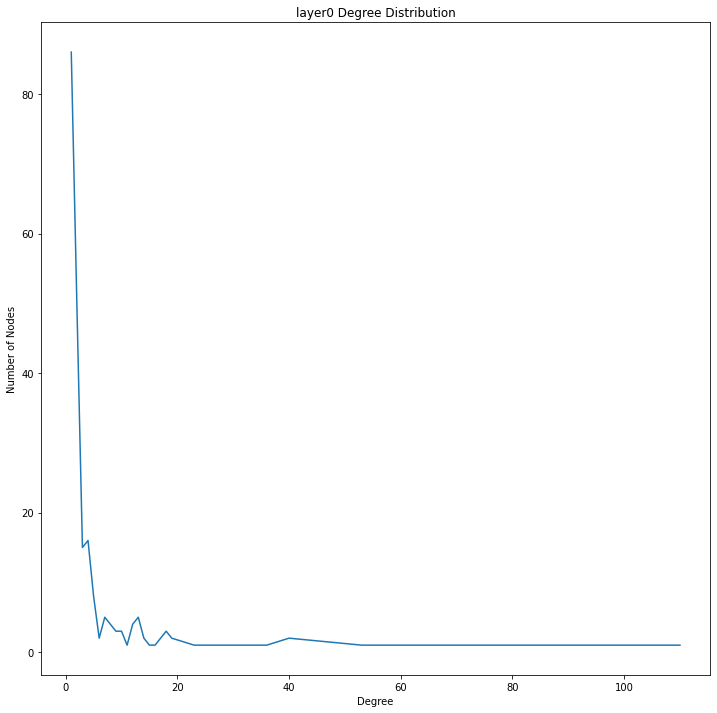

In [32]:
# Plot Degree Distribution Graph
plt.figure(figsize=(12,12))
plt.plot(degdist['labels'],degdist['freq'])
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("layer0 Degree Distribution")
plt.savefig("DegDistribution.png", dpi=200)
plt.show()

In [33]:
# To find Degree Centrality in sorted order
# By this we can also confirm the top 5 nodes or Hub names
a = nx.degree_centrality(route_graph)
for w in sorted(a, key=a.get, reverse=True):
    print(w, a[w])

PVG 0.49773755656108604
KMG 0.3257918552036199
SHA 0.24886877828054302
XIY 0.2398190045248869
NAY 0.1809954751131222
PEK 0.1809954751131222
NKG 0.16289592760180996
TAO 0.14479638009049775
WUH 0.14027149321266968
CTU 0.11764705882352942
CAN 0.10407239819004525
KHN 0.08597285067873305
HKG 0.08597285067873305
NGB 0.08144796380090498
HGH 0.08144796380090498
TYN 0.08144796380090498
CKG 0.07239819004524888
TPE 0.06787330316742082
LHW 0.06334841628959277
SZX 0.06334841628959277
SJW 0.05882352941176471
HFE 0.05882352941176471
XMN 0.05882352941176471
DLC 0.05882352941176471
NNG 0.05882352941176471
WNZ 0.05429864253393665
WUX 0.05429864253393665
HET 0.05429864253393665
CSX 0.05429864253393665
HRB 0.0497737556561086
CGO 0.04524886877828055
URC 0.04524886877828055
CZX 0.04524886877828055
AMS 0.04072398190045249
INC 0.04072398190045249
ICN 0.04072398190045249
SIN 0.03619909502262444
LJG 0.03619909502262444
TNA 0.03619909502262444
XNN 0.03619909502262444
TSN 0.031674208144796386
KWL 0.03167420814479

# ***Additional Code to Plot Graph for Top-5 Hubs Individually***

In [34]:
# # Plotting Graph for PVG Airport which is first in our hubs

# g1 = nx.bfs_tree(route_graph, 'PVG')
# plt.figure(figsize=(30,30))
# nx.draw_networkx(g1,with_labels=True,node_size=1000)
# plt.show()

In [35]:
# # Plotting Graph for KMG Airport which is second in our hubs

# g2 = nx.bfs_tree(route_graph, 'KMG')
# plt.figure(figsize=(30,30))
# nx.draw_networkx(g2,with_labels=True,node_size=1000)
# plt.show()

In [36]:
# # Plotting Graph for SHA Airport which is Third in our hubs

# g3 = nx.bfs_tree(route_graph, 'SHA')
# plt.figure(figsize=(30,30))
# nx.draw_networkx(g3,with_labels=True,node_size=1000)
# plt.show()

In [37]:
# # Plotting Graph for XIY Airport which is fourth in our hubs

# g4 = nx.bfs_tree(route_graph, 'XIY')
# plt.figure(figsize=(30,30))
# nx.draw_networkx(g4,with_labels=True,node_size=1000)
# plt.show()

In [38]:
# # Plotting Graph for NAY Airport which is fifth in our hubs

# g5 = nx.bfs_tree(route_graph, 'NAY')
# plt.figure(figsize=(30,30))
# nx.draw_networkx(g5,with_labels=True,node_size=1000)
# plt.show()